In [1]:
import math
import sys
sys.path.append('../../../')
from pprint import pprint
import time
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pickle
seed = 42
np.random.seed(seed)

In [2]:
# analyticalResult = sin^2(θ)
# θ = arcsin(sqrt(analyticalResult))
b_max = 1 / 2  # upper limit of integral # 5
nbit = 10  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2 ** nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5)) ** 2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

print("theoretical theta: ", np.arcsin(np.sqrt(analyticResult)))

Analytical Result: 0.07926450759605175
Discretized Result: 0.07926449087752495
theoretical theta:  0.2853981633974483


In [3]:
from qiskit import QuantumRegister
from qiskit import execute
from qiskit import Aer
from scipy import optimize
from lib_grover import *

In [4]:
#setting the number of shots and Grover operators.
max_iter = 10
number_grover_list = [1, 2, 4, 8, 16, 32, 64]  # list of number of Grover operators
shots = 100
shots_list = [shots] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception('The length of shots_list should be equal to the length eof number_grover_list.')

backend = Aer.get_backend('qasm_simulator')

# Load Data

In [5]:
with open("pkls/ignis_info_list_list.pkl", "rb") as f:
    ignis_info_list_list = pickle.load(f)
with open("pkls/lnp_info_list_list.pkl", "rb") as f:
    lnp_info_list_list = pickle.load(f)
with open("pkls/delta_info_list_list.pkl", "rb") as f:
    delta_info_list_list = pickle.load(f)
with open("pkls/mooney001_info_list_list.pkl", "rb") as f:
    mooney001_info_list_list = pickle.load(f)
with open("pkls/mthree_lu_info_list_list.pkl", "rb") as f:
    mthree_lu_info_list_list = pickle.load(f)

In [6]:
with open("pkls/raw_hit_list_list.pkl", "rb") as f:
    raw_hit_list_list = pickle.load(f)
with open("pkls/ignis_hit_list_list.pkl", "rb") as f:
    ignis_hit_list_list = pickle.load(f)
with open("pkls/lnp_hit_list_list.pkl", "rb") as f:
    lnp_hit_list_list = pickle.load(f)
with open("pkls/delta_hit_list_list.pkl", "rb") as f:
    delta_hit_list_list = pickle.load(f)
with open("pkls/mooney001_hit_list_list.pkl", "rb") as f:
    mooney001_hit_list_list = pickle.load(f)
with open("pkls/mthree_lu_hit_list_list.pkl", "rb") as f:
    mthree_lu_hit_list_list = pickle.load(f)

In [7]:
mean_raw_hit_list = np.mean(np.asarray(raw_hit_list_list), axis=0)
stddev_raw_hit_list = np.std(np.asarray(raw_hit_list_list), axis=0)
mean_ignis_hit_list = np.mean(np.asarray(ignis_hit_list_list), axis=0)
stddev_ignis_hit_list = np.std(np.asarray(ignis_hit_list_list), axis=0)
mean_delta_hit_list = np.mean(np.asarray(delta_hit_list_list), axis=0)
stddev_delta_hit_list = np.std(np.asarray(delta_hit_list_list), axis=0)
mean_lnp_hit_list = np.mean(np.asarray(lnp_hit_list_list), axis=0)
stddev_lnp_hit_list = np.std(np.asarray(lnp_hit_list_list), axis=0)
mean_mooney001_hit_list = np.mean(np.asarray(mooney001_hit_list_list), axis=0)
stddev_mooney001_hit_list = np.std(np.asarray(mooney001_hit_list_list), axis=0)
mean_mthree_lu_hit_list = np.mean(np.asarray(mthree_lu_hit_list_list) * shots, axis=0)
stddev_mthree_lu_hit_list = np.std(np.asarray(mthree_lu_hit_list_list) * shots, axis=0)

In [8]:
raw_hit_list_list = np.asarray(raw_hit_list_list)
ignis_hit_list_list = np.asarray(ignis_hit_list_list)
delta_hit_list_list = np.asarray(delta_hit_list_list)
lnp_hit_list_list = np.asarray(lnp_hit_list_list)
mooney001_hit_list_list = np.asarray(mooney001_hit_list_list)
mthree_lu_hit_list_list = np.asarray(mthree_lu_hit_list_list) * shots

In [9]:
pprint(mean_raw_hit_list)
pprint(mean_ignis_hit_list)
pprint(mean_delta_hit_list)
pprint(mean_lnp_hit_list)
pprint(mean_mooney001_hit_list)
pprint(mean_mthree_lu_hit_list)

array([41. , 13.2, 26.1,  5.4, 51.1, 42.5, 10.6])
array([68.88043096, 18.00648995, 41.79777655,  4.26919038, 86.66672006,
       71.22961096, 13.3341041 ])
array([70.41310324, 19.55396746, 43.26959119,  5.4384759 , 88.6302308 ,
       73.29281812, 14.90997451])
array([68.86188853, 17.94078291, 41.7506405 ,  4.20314059, 86.69567926,
       71.19491138, 13.28145508])
array([72.87599578, 16.94585434, 44.82689289,  0.        , 91.78371584,
       75.5850789 , 10.73390255])
array([62.07278254, 14.82761459, 36.90784335,  3.82328623, 79.52185834,
       63.54303103, 11.13984027])


In [10]:
pprint(raw_hit_list_list[0])
pprint(ignis_hit_list_list[0])
pprint(delta_hit_list_list[0])
pprint(lnp_hit_list_list[0])
pprint(mooney001_hit_list_list[0])
pprint(mthree_lu_hit_list_list[0])

array([40, 10, 24,  3, 43, 49, 10])
array([65.96506951, 12.55940298, 37.98812559,  0.45628972, 71.5807416 ,
       83.97352955, 13.94230006])
array([68.14531955, 14.14129101, 39.29593581,  1.53844667, 73.32100152,
       86.06758758, 15.12292995])
array([65.89020167, 12.34811909, 37.78331763,  0.30136756, 71.65147615,
       83.94956887, 13.79189887])
array([70.92938398,  0.        , 41.00362024,  0.        , 76.60822675,
       87.60451458,  0.        ])
array([57.95214706, 10.70432517, 33.86676979,  1.0583568 , 64.69744137,
       70.25102954,  9.99356794])


# Plot Mean Values of the Population of All-zero State

Text(0, 0.5, 'population of $|00...0\\rangle$')

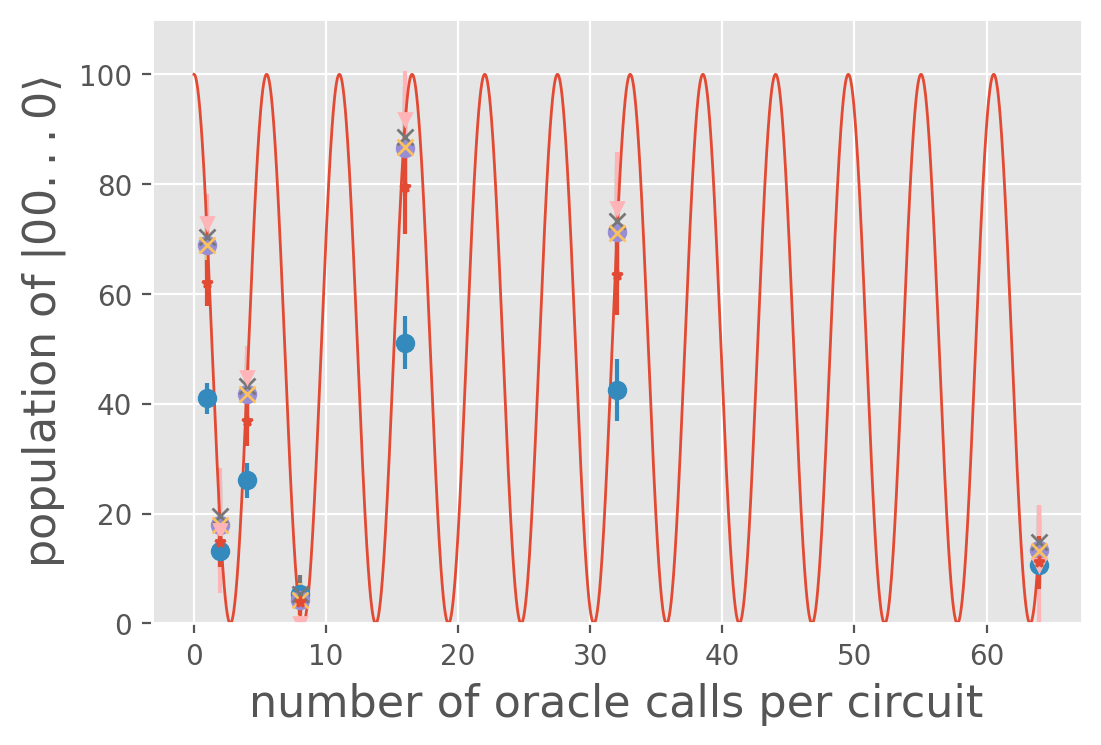

In [11]:
divide = 10000
plt.figure(dpi=200)
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         shots * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arcsin(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C0", lw=1)
plt.errorbar(number_grover_list, mean_raw_hit_list, stddev_raw_hit_list, linestyle='None', marker="o", label="raw results", color="C1", markersize=6)
plt.errorbar(number_grover_list, mean_ignis_hit_list, stddev_ignis_hit_list, linestyle='None', marker="o", label="rigorous tensored", color="C2", markersize=6)
plt.errorbar(number_grover_list, mean_delta_hit_list, stddev_delta_hit_list, linestyle='None',  marker="x", label="proposed (delta)", color="C3", markersize=6)
plt.errorbar(number_grover_list, mean_lnp_hit_list, stddev_lnp_hit_list, linestyle='None',  marker="x", label="proposed (least norm)", color="C4", markersize=6)
# plt.errorbar(number_grover_list, mean_mooney01_hit_list, stddev_mooney01_hit_list, linestyle='None',  marker="v", label="Mooney et al. (threshold = 0.1)", color="C5", markersize=4)
plt.errorbar(number_grover_list, mean_mooney001_hit_list, stddev_mooney001_hit_list, linestyle='None', marker="v", label="Mooney et al. (t = 0.01)", color="C6", markersize=4)
# plt.errorbar(number_grover_list, mean_nation_lu_hit_list, stddev_nation_lu_hit_list, linestyle='None', marker="^", label="Nation et al. (lu)", color="C7", markersize=4)
# plt.errorbar(number_grover_list, mean_nation_bicgstab_hit_list, stddev_nation_bicgstab_hit_list, linestyle='None', marker="^", label="Nation et al. (bicgstab)", color="C8", markersize=4)
plt.errorbar(number_grover_list, mean_mthree_lu_hit_list, stddev_mthree_lu_hit_list, linestyle='None', marker="*", label="mthree (lu)", color="C7", markersize=4)
# plt.errorbar(number_grover_list, mean_mthree_gmres_hit_list, stddev_mthree_gmres_hit_list, linestyle='None', marker="*", label="mthree (gmres)", color="C8", markersize=2)
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.ylim(0, 110)
# plt.title(r"10-qubit, $b_{max}=1/2$, 100 shots, $p(0|1)=p(1|0)=0.01$")
plt.xlabel(r"number of oracle calls per circuit", fontsize=16)
plt.ylabel(r"population of $|00...0\rangle$", fontsize=16)

# Create Theta Candidate List for each attempt

`thetaCandidate_*_list_list` is a 2d list.

In [12]:
print("raw")
thetaCandidate_raw_list_list = []
for iter_count, raw_hit_list in enumerate(raw_hit_list_list):
    thetaCandidate_raw_list_list.append( calculate_theta(raw_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("ignis")
thetaCandidate_ignis_list_list = []
for iter_count, ignis_hit_list in enumerate(ignis_hit_list_list):
    thetaCandidate_ignis_list_list.append( calculate_theta(ignis_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("delta")
thetaCandidate_delta_list_list = []
for iter_count, delta_hit_list in enumerate(delta_hit_list_list):
    thetaCandidate_delta_list_list.append( calculate_theta(delta_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("lnp")
thetaCandidate_lnp_list_list = []
for iter_count, lnp_hit_list in enumerate(lnp_hit_list_list):
    thetaCandidate_lnp_list_list.append( calculate_theta(lnp_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("mooney")
thetaCandidate_mooney001_list_list = []
for iter_count, mooney001_hit_list in enumerate(mooney001_hit_list_list):
    thetaCandidate_mooney001_list_list.append( calculate_theta(mooney001_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")
print("mthree")
thetaCandidate_mthree_lu_list_list = []
for iter_count, mthree_lu_hit_list in enumerate(mthree_lu_hit_list_list):
    thetaCandidate_mthree_lu_list_list.append( calculate_theta(mthree_lu_hit_list, number_grover_list, shots_list) )
    print("iter", iter_count + 1, "finished")

raw
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
ignis
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
delta
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
lnp
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
mooney
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
mthree
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished


# Calculate the Estimation Error from the Correct Theta

In [13]:
error_raw_list = np.zeros_like(number_grover_list,dtype=float)
error_raw_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_raw_list in thetaCandidate_raw_list_list:
    error_raw_list += (np.sin(thetaCandidate_raw_list)**2 - discretizedResult)**2  # list of estimation errors
    error_raw_list_list.append(np.sin(thetaCandidate_raw_list)**2 - discretizedResult)
error_raw_list = ( error_raw_list / (max_iter - 1) ) ** (1 / 2)

In [14]:
error_ignis_list = np.zeros_like(number_grover_list,dtype=float)
error_ignis_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_ignis_list in thetaCandidate_ignis_list_list:
    error_ignis_list += (np.sin(thetaCandidate_ignis_list)**2 - discretizedResult)**2  # list of estimation errors
    error_ignis_list_list.append(np.sin(thetaCandidate_ignis_list)**2 - discretizedResult)
error_ignis_list = ( error_ignis_list / (max_iter - 1) ) ** (1 / 2)

In [15]:
error_delta_list = np.zeros_like(number_grover_list,dtype=float)
error_delta_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_delta_list in thetaCandidate_delta_list_list:
    error_delta_list += (np.sin(thetaCandidate_delta_list)**2 - discretizedResult)**2  # list of estimation errors
    error_delta_list_list.append(np.sin(thetaCandidate_delta_list)**2 - discretizedResult)
error_delta_list = ( error_delta_list / (max_iter - 1) ) ** (1 / 2)

In [16]:
error_lnp_list = np.zeros_like(number_grover_list,dtype=float)
error_lnp_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_lnp_list in thetaCandidate_lnp_list_list:
    error_lnp_list += (np.sin(thetaCandidate_lnp_list)**2 - discretizedResult)**2  # list of estimation errors
    error_lnp_list_list.append(np.sin(thetaCandidate_lnp_list)**2 - discretizedResult)
error_lnp_list = ( error_lnp_list / (max_iter - 1) ) ** (1 / 2)

In [17]:
error_mooney001_list = np.zeros_like(number_grover_list,dtype=float)
error_mooney001_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_mooney001_list in thetaCandidate_mooney001_list_list:
    error_mooney001_list += (np.sin(thetaCandidate_mooney001_list)**2 - discretizedResult)**2  # list of estimation errors
    error_mooney001_list_list.append(np.sin(thetaCandidate_mooney001_list)**2 - discretizedResult)
error_mooney001_list = ( error_mooney001_list / (max_iter - 1) ) ** (1 / 2)

In [18]:
error_mthree_lu_list = np.zeros_like(number_grover_list,dtype=float)
error_mthree_lu_list_list = [np.zeros_like(number_grover_list,dtype=float)]
for thetaCandidate_mthree_lu_list in thetaCandidate_mthree_lu_list_list:
    error_mthree_lu_list += (np.sin(thetaCandidate_mthree_lu_list)**2 - discretizedResult)**2  # list of estimation errors
    error_mthree_lu_list_list.append(np.sin(thetaCandidate_mthree_lu_list)**2 - discretizedResult)
error_mthree_lu_list = ( error_mthree_lu_list / (max_iter - 1) ) ** (1 / 2)

# Theoretical Lower Bound

In [19]:
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append( CalcNumberOracleCalls(i, shots_list, number_grover_list) )
    ErrorCramérRao_list.append( CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list) )

# Plot the Averaged Estimation Error

<Figure size 432x288 with 0 Axes>

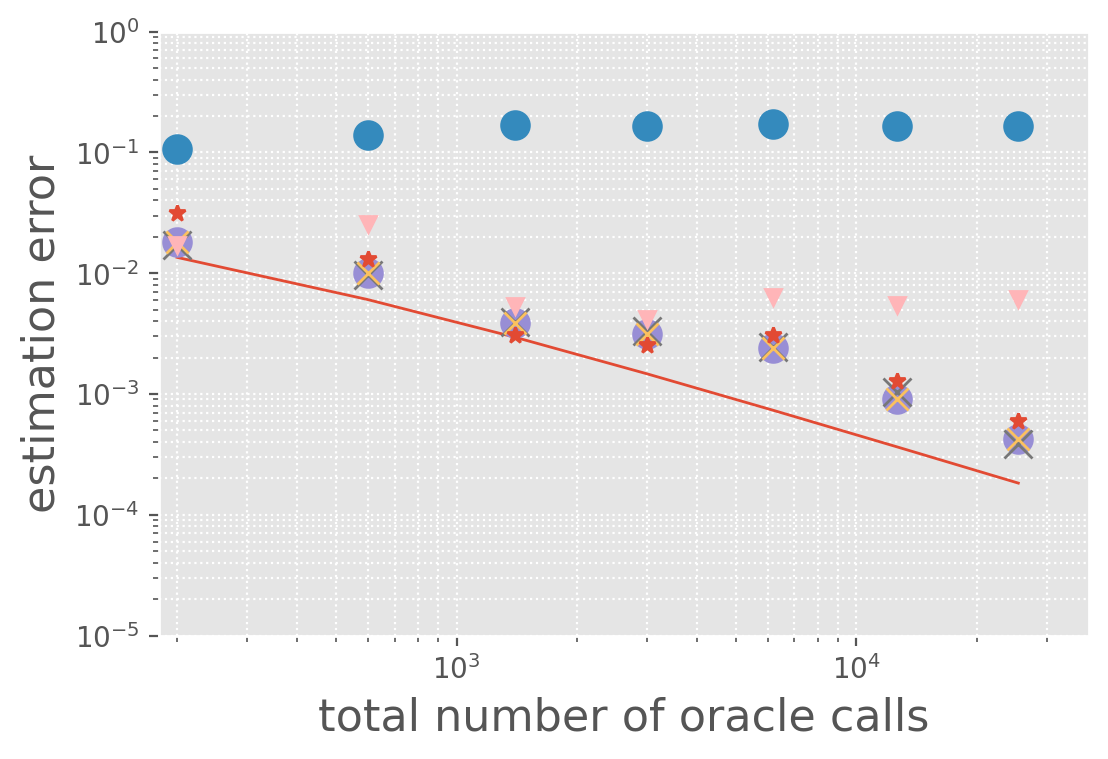

In [20]:
plt.clf()
plt.figure(dpi=200)
plt.style.use('ggplot')
p_theoretical = plt.loglog( OracleCall_list, ErrorCramérRao_list, color='C0', lw=1)
p_raw = plt.loglog( OracleCall_list, error_raw_list, 'o', color='C1', markersize=10)
p_ignis = plt.loglog( OracleCall_list, error_ignis_list, 'o', color='C2', markersize=10)
p_delta = plt.loglog( OracleCall_list, error_delta_list, 'x', color='C3', markersize=10)
p_lnp = plt.loglog( OracleCall_list, error_lnp_list, 'x', color='C4', markersize=8)
# p_mooney01 = plt.loglog( OracleCall_list, error_mooney01_list, 'v', color='C5', markersize=8)
p_mooney001 = plt.loglog( OracleCall_list, error_mooney001_list, 'v', color='C6', markersize=6)
# p_nation_lu = plt.loglog( OracleCall_list, error_nation_lu_list, '^', color='C7', markersize=6)
# p_nation_bicgstab = plt.loglog( OracleCall_list, error_nation_bicgstab_list, '^', color='C8', markersize=4)
p_mthree_lu = plt.loglog( OracleCall_list, error_mthree_lu_list, '*', color='C7', markersize=6)
# p_mthree_gmres = plt.loglog( OracleCall_list, error_mthree_gmres_list, '*', color='C8', markersize=4)


# plt.title(r"10-qubit, $b_{max}=1/2$, 100 shots, $p(0|1)=p(1|0)=0.01$")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("total number of oracle calls", fontsize=16)
plt.ylim(0.00001, 1)
plt.ylabel("estimation error", fontsize=16)
plt.grid(True, which="both", ls="dotted")